In [1]:
import nltk as nltk
import numpy as np

In [2]:
# the method below starts a pop-up, but may not be on top!
# nltk.download()

In [3]:
# see https://www.nltk.org/data.html for help on installing a corpus
from nltk.corpus import alpino

In [4]:
nltk.download('alpino')

[nltk_data] Downloading package alpino to
[nltk_data]     C:\ProgramData\Anaconda3\nltk_data...
[nltk_data]   Package alpino is already up-to-date!


True

In [5]:
a = nltk.corpus.alpino

In [6]:
w = a.words()

In [7]:
print(len(w))

139820


## Import tags of verses as a table

In [8]:
import os
import pandas as pd


df_tags = pd.DataFrame()
list_ = []

dir = './rijmdata/tagbase'
for filename in os.listdir(dir):
    filepath = dir+'/'+filename
    
    # check if not an empty tag file
    with open (filepath, "r") as myfile:
        data=myfile.readlines()
        if len(data)<=1:
            print("skipping ", filepath)
            continue
    
    print("importing ",filepath )    
    df = pd.read_csv(filepath, sep=',', skiprows=1, header=None, dtype=str)
    list_.append(df)
df_tags = pd.concat(list_)
df_tags.columns = ['tag','verse_id']
df_tags['tag'] = df_tags['tag'].astype('str') 

importing  ./rijmdata/tagbase/tags1.cat
importing  ./rijmdata/tagbase/tags10.cat
importing  ./rijmdata/tagbase/tags11.cat
importing  ./rijmdata/tagbase/tags12.cat
importing  ./rijmdata/tagbase/tags13.cat
importing  ./rijmdata/tagbase/tags14.cat
importing  ./rijmdata/tagbase/tags15.cat
importing  ./rijmdata/tagbase/tags16.cat
importing  ./rijmdata/tagbase/tags17.cat
importing  ./rijmdata/tagbase/tags18.cat
importing  ./rijmdata/tagbase/tags19.cat
importing  ./rijmdata/tagbase/tags2.cat
importing  ./rijmdata/tagbase/tags20.cat
importing  ./rijmdata/tagbase/tags21.cat
importing  ./rijmdata/tagbase/tags22.cat
importing  ./rijmdata/tagbase/tags23.cat
skipping  ./rijmdata/tagbase/tags24.cat
skipping  ./rijmdata/tagbase/tags25.cat
importing  ./rijmdata/tagbase/tags26.cat
skipping  ./rijmdata/tagbase/tags27.cat
skipping  ./rijmdata/tagbase/tags28.cat
skipping  ./rijmdata/tagbase/tags29.cat
importing  ./rijmdata/tagbase/tags3.cat
skipping  ./rijmdata/tagbase/tags30.cat
skipping  ./rijmdata/tagb

In [9]:
df_tags[df_tags['verse_id']=='002']

,tag,verse_id
8,Kado,002
6,machtig,002
43,mooi,002
84,prachtig,002
0,Cadeau,002


## Import the verses

In [10]:
import re

def remove_html(input):
    "very simple version"
    tagreg = re.compile(r'(<!--.*?-->|<[^>]*>)')
    no_html = tagreg.sub(' ', input)
    return no_html


df_verses = pd.DataFrame()
list_ = []

dir = './rijmdata/versebase'
for filename in os.listdir(dir):
    filepath = dir+'/'+filename
    
    print("importing verses from ",filepath )
    
    with open (filepath, "r") as myfile:
        data=myfile.readlines()
    
    # first two lines is header, then each line is a verse
    for i in range(2,len(data)):
        # first number (until first comma) is it's verse_id
        line = data[i]
        id, title, verse = line.split(',',2)     
        list_.append([id, title, remove_html(verse)])
        
df_verses = pd.DataFrame(list_, columns=['verse_id','title','verse'])
df_verses['verse_id'] = df_verses['verse_id'].astype('str')
#df_verses.set_index('verse_id', inplace=True)

importing verses from  ./rijmdata/versebase/verses27.cat
importing verses from  ./rijmdata/versebase/verses28.cat
importing verses from  ./rijmdata/versebase/verses29.cat
importing verses from  ./rijmdata/versebase/verses30.cat
importing verses from  ./rijmdata/versebase/verses31.cat
importing verses from  ./rijmdata/versebase/verses32.cat
importing verses from  ./rijmdata/versebase/verses33.cat
importing verses from  ./rijmdata/versebase/verses34.cat
importing verses from  ./rijmdata/versebase/verses35.cat
importing verses from  ./rijmdata/versebase/verses36.cat
importing verses from  ./rijmdata/versebase/verses37.cat


In [11]:
df_verses.head(10)

,verse_id,title,verse
0,001,te dik door snacken,"Sint zag jou laatst weer snacken, hij kneep z..."
1,002,Mooi Kado,"oh oh oh Wat een mooi kado allemachtig, is ec..."
2,011,Internet-cadeau te laat,"Helaas ging internet niet zo snel, maar krijge..."
3,012,Opknapbeurt,Soms kijk ik in de spiegel en wordt dan helema...
4,02,Hulp voor de kerstman,Sint vindt als sportieve vent de kerstman ech...
5,021,bloem en kus in de regen,Jou ogen stralen van geluk Jij geeft mij een p...
6,022,Toneel,Sinterklaas wilde naar een voorstelling kijken...
7,031,Opgegeten letter,"Een letter van chocola is wat je wou, maar Sin..."
8,032,Plaid,Je wilde iets om het wat warmer te krijgen en ...
9,041,televisie kijken,"Als je je huiswerk hebt weten te klaren, ga je..."


## Merge with tags

### first, consolidate the tags (this was hard!)

In [12]:
  
df_tags_sorted = df_tags.sort_values('verse_id')
df_tags_sorted['tags'] = df_tags_sorted.groupby('verse_id').transform(lambda k: ','.join(k))
df_tags_condensed = df_tags_sorted[['verse_id','tags']].drop_duplicates()

#df_tags_condensed.index.name='verse_id'

In [13]:
# Check
df_tags_condensed[df_tags_condensed['verse_id']=='641']

,verse_id,tags
79,641,"voetbal,ajax,voetballen,Sinterklaas"


In [14]:
df_verses_tagged = pd.merge(df_verses, df_tags_condensed, how='left', on=['verse_id'])

In [15]:
df_verses_tagged

,verse_id,title,verse,tags
0,001,te dik door snacken,"Sint zag jou laatst weer snacken, hij kneep z...","gewicht,snacken,lekker,eten,bikini,zomer,dik,z..."
1,002,Mooi Kado,"oh oh oh Wat een mooi kado allemachtig, is ec...","Cadeau,prachtig,Kado,mooi,machtig"
2,011,Internet-cadeau te laat,"Helaas ging internet niet zo snel, maar krijge...","afbeelding,laat,hebbeding,internet,snel,cadeau..."
3,012,Opknapbeurt,Soms kijk ik in de spiegel en wordt dan helema...,"onverzorgd,stank,ongeschoren,opknapbeurt,lelij..."
4,02,Hulp voor de kerstman,Sint vindt als sportieve vent de kerstman ech...,NaN
5,021,bloem en kus in de regen,Jou ogen stralen van geluk Jij geeft mij een p...,"kus,geluk,verlegen,bloemen,bloemstuk,liefde,regen"
6,022,Toneel,Sinterklaas wilde naar een voorstelling kijken...,Toneel theater
7,031,Opgegeten letter,"Een letter van chocola is wat je wou, maar Sin...","letter,sinterklaas,chocola,chocolade,eten"
8,032,Plaid,Je wilde iets om het wat warmer te krijgen en ...,plaid
9,041,televisie kijken,"Als je je huiswerk hebt weten te klaren, ga je...","vierkant,tv,huiswerk,kijken,ogen,televisie"


In [16]:
df_verses_tagged = df_verses_tagged.replace(np.nan, '', regex=True)

** THIS WAS REALLY TOUGH! **

In [225]:
df_verses_tagged['ascii_verse'] = df_verses_tagged['title'].astype(str) + ' ' + df_verses_tagged['verse'].astype(str)
# replace non-ascii characters by space
df_verses_tagged['ascii_verse'] = df_verses_tagged['ascii_verse'].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

In [226]:
df_verses_tagged['ascii_verse'].head(3)

0    te dik door snacken Sint zag jou laatst weer s...
1    Mooi Kado oh oh oh  Wat een mooi kado allemach...
2    Internet-cadeau te laat Helaas ging internet n...
Name: ascii_verse, dtype: object

In [227]:
df_verses_tagged['ascii_verse'].to_csv('test.txt', index=False, encoding='ascii')

# Try just TF-IDF similarities

In [17]:
# from https://stackoverflow.com/questions/8897593/similarity-between-two-text-documents
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() 
tfidf = vectorizer.fit_transform(df_verses_tagged['verse'])
# no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity = tfidf * tfidf.T

In [18]:
print(pairwise_similarity[0,0])

0.9999999999999997


In [19]:
a = pairwise_similarity.A
print(a[(a>0.5) & (a<0.99)])

[0.8471262  0.52446687 0.8471262  0.72841687 0.52446687 0.72841687]


In [20]:
print(pairwise_similarity.shape)

(231, 231)


In [21]:
import seaborn as sns
sns.heatmap(a)

In [22]:
# look at https://medium.com/@rnbrown/more-nlp-with-sklearns-countvectorizer-add577a0b8c8  for lemmatization

In [23]:
def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

In [24]:
vectorizer2 = TfidfVectorizer() 
tfidf2 = vectorizer2.fit_transform(df_verses_tagged['tags'])
# no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity2 = tfidf2 * tfidf2.T

In [25]:
print(pairwise_similarity2)

  (0, 226)	0.06262802614472601
  (0, 7)	0.13711214260276583
  (0, 202)	0.0805280322543471
  (0, 161)	0.05828143640859609
  (0, 133)	0.23199368974687562
  (0, 109)	0.22675085720705626
  (0, 91)	0.07706200210935597
  (0, 65)	0.0548489325038545
  (0, 60)	0.0680985363816584
  (0, 38)	0.06981498561356037
  (0, 27)	0.13075538231217623
  (0, 11)	0.06745629599566252
  (0, 0)	1.0
  (1, 205)	0.09548111788018586
  (1, 192)	0.0794219555588531
  (1, 60)	0.11374078443106787
  (1, 38)	0.11660766369817083
  (1, 26)	0.13978175641391494
  (1, 16)	0.13207352162541522
  (1, 131)	0.11532197094729023
  (1, 70)	0.09226099427804751
  (1, 163)	0.21895922149275943
  (1, 225)	0.08847490106976666
  (1, 204)	0.0666849214632201
  (1, 202)	0.06352212810225771
  :	:
  (229, 150)	0.06799056211568823
  (229, 144)	0.058559598048403584
  (229, 136)	0.0998031141566748
  (229, 133)	0.03693949999615218
  (229, 131)	0.04029571007891715
  (229, 129)	0.11630260409136661
  (229, 124)	0.06885051330741455
  (229, 107)	0.091103142

In [26]:
d = pairwise_similarity2.A
print(d[(d>0.5) & (d<0.99)])

[0.54225729 0.66907831 0.75792586 0.58873469 0.51212812 0.66907831
 0.75792586 0.58873469 0.51212812 0.54225729 0.51853107 0.51853107
 0.55157905 0.55157905]


# LSA / word-2-vec - Compare verse, tags, and titles with LSA

In [35]:
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning,module="pandas", lineno=570)

In [185]:
docs = df_verses_tagged['verse']
vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(docs)
pd.DataFrame(dtm.toarray(),index=docs,columns=vectorizer.get_feature_names()).head(3)


,12,18,480,50,aafke,aai,aaien,aan,aandeel,aangekomen,...,zwarte,zwembad,zwembroek,zwemmen,zweten,zwijgen,zwijn,écht,één,óók
verse,,,,,,,,,,,,,,,,,,,,,
"Sint zag jou laatst weer snacken, hij kneep zijn ogen dicht hij dacht: het is wel lekker maar slecht voor haar (zijn) gewicht als zij (hij) met zoveel eten nog lang zo door blijft gaan dan kan zij (hij) deze zomer niet haar bikini (zijn zwembroek)aan. (met dank aan Mieke) \n",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105070,0.0,0.0,...,0.0,0.0,0.191403,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"oh oh oh Wat een mooi kado allemachtig, is echt prachtig! (met dank aan Ivy) \n",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083100,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Helaas ging internet niet zo snel, maar krijgen doe je hem nog wel. Geniet maar vast van deze afbeelding, want het is echt een hebbeding. (met dank aan Winnie) \n",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081076,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
# Get words that correspond to each column
vectorizer.get_feature_names()

['12',
 '18',
 '480',
 '50',
 'aafke',
 'aai',
 'aaien',
 'aan',
 'aandeel',
 'aangekomen',
 'aangemerkt',
 'aangesproken',
 'aangetrokken',
 'aankoopbon',
 'aanreiken',
 'aansteken',
 'aantal',
 'aardig',
 'achter',
 'achteraan',
 'achterdeel',
 'achterna',
 'achterop',
 'achterste',
 'actief',
 'actieplan',
 'af',
 'afbeelding',
 'afgekloven',
 'afgelopen',
 'afgeschoren',
 'afscheid',
 'afschrift',
 'afspraken',
 'afstand',
 'afvegen',
 'afwasflop',
 'agendavulling',
 'ajax',
 'al',
 'alcohol',
 'aldaar',
 'aldoor',
 'aldus',
 'alle',
 'alleen',
 'allemaal',
 'allemachtig',
 'allen',
 'allerhande',
 'allerlei',
 'alles',
 'als',
 'alsjeblieft',
 'alternatief',
 'altijd',
 'alweer',
 'amarilis',
 'ambities',
 'analyse',
 'ander',
 'andere',
 'anderen',
 'anders',
 'anne',
 'anoniem',
 'antislip',
 'app',
 'apparaat',
 'appelkleuren',
 'appels',
 'arm',
 'arrangement',
 'as',
 'asfalt',
 'asjemenou',
 'assisteren',
 'atletische',
 'attribuut',
 'auto',
 'avond',
 'avondje',
 'aya',
 '

In [188]:
vectorizer2.get_feature_names()

['aandelen',
 'accenten',
 'aftershave',
 'agenda',
 'ajax',
 'al',
 'alles',
 'als',
 'alternatief',
 'amarilus',
 'andere',
 'asjemenou',
 'auto',
 'baby',
 'backpacken',
 'bank',
 'beat',
 'bed',
 'begin',
 'beginnetje',
 'begonnen',
 'ben',
 'bezoek',
 'bib',
 'bij',
 'bijna',
 'binnen',
 'bioscoopbon',
 'blendle',
 'blij',
 'bloem',
 'bloembol',
 'bloemen',
 'bodylotion',
 'boek',
 'boeken',
 'boekenbon',
 'boekenkast',
 'boerenlater',
 'bon',
 'borrel',
 'bouwer',
 'brengt',
 'broek',
 'buiten',
 'cadeau',
 'cadeautjes',
 'cd',
 'celibaat',
 'chaotisch',
 'chocoladeletter',
 'cliché',
 'com',
 'concours',
 'dacht',
 'dag',
 'dagen',
 'dak',
 'dames',
 'dansen',
 'dansleraar',
 'daten',
 'de',
 'december',
 'denk',
 'dik',
 'doch',
 'dood',
 'door',
 'drank',
 'drop',
 'dvd',
 'echte',
 'een',
 'eens',
 'eenzaam',
 'einde',
 'en',
 'enkele',
 'er',
 'fan',
 'fazant',
 'fietsbel',
 'files',
 'flatulent',
 'fles',
 'fortis',
 'foute',
 'frankrijk',
 'ga',
 'gaan',
 'gamer',
 'gangst

In [157]:
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(10, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm.asfptype())
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [158]:
pd.DataFrame(lsa.components_,columns = vectorizer.get_feature_names())

,12,18,480,50,aafke,aai,aaien,aan,aandeel,aangekomen,...,zwarte,zwembad,zwembroek,zwemmen,zweten,zwijgen,zwijn,écht,één,óók
0,0.003167,0.003645,0.003107,0.003347,0.003530,0.004865,0.003150,0.154496,0.003470,0.009535,...,0.011692,0.002007,0.003080,0.002739,0.003455,0.008322,0.003108,0.003556,0.004309,0.003004
1,0.010330,-0.001362,0.010072,-0.001615,0.001678,-0.005260,-0.002854,0.058974,-0.002788,-0.008329,...,-0.012899,-0.000191,-0.001663,0.000451,-0.004003,-0.008782,-0.004657,-0.004095,-0.004911,0.002477
2,0.003328,-0.001773,0.001260,-0.004647,-0.011573,-0.009177,-0.006128,-0.084883,0.004870,-0.024342,...,-0.034056,0.000871,-0.017573,0.001028,0.021695,-0.006987,-0.002430,-0.008949,-0.003846,-0.005568
3,-0.002986,0.005137,-0.005313,0.001651,-0.010133,-0.035767,-0.000814,0.048234,0.002408,0.038025,...,0.035102,0.000325,0.001144,-0.001957,0.001854,-0.016339,-0.001803,-0.002940,-0.010277,-0.011817
4,-0.000284,0.004439,0.012272,-0.010660,0.001671,0.008238,-0.010602,-0.043340,-0.000891,-0.018484,...,-0.007984,-0.003815,-0.006011,0.000639,-0.002834,0.006701,-0.002454,0.005783,0.012726,0.001589
5,-0.003430,-0.000299,-0.006346,-0.008952,-0.003764,-0.012973,-0.000437,0.082803,-0.005703,-0.002549,...,-0.043440,0.004494,0.007955,0.005409,-0.014239,-0.025856,0.013427,-0.004041,0.010793,-0.007340
6,0.000722,-0.002080,0.002235,0.003250,-0.005428,-0.002052,0.002609,-0.200591,0.007788,-0.027214,...,-0.014147,-0.003714,-0.016842,0.004539,-0.008855,-0.001629,0.025899,0.004946,0.004913,-0.000178
7,0.001386,0.004286,-0.007044,-0.003311,-0.005187,-0.006410,-0.005310,-0.064046,-0.007867,-0.037756,...,-0.025382,-0.008813,0.020525,-0.004204,-0.008534,0.020567,0.007283,0.001459,0.002946,-0.003184
8,0.003983,-0.010442,0.002530,-0.017707,0.020613,-0.008617,-0.009680,0.112066,-0.010196,-0.008485,...,0.003473,-0.005102,0.022393,-0.010915,0.009123,0.018197,0.001340,-0.002904,-0.011655,-0.002720
9,0.002688,0.000773,0.003441,-0.000063,-0.000691,-0.005689,0.002690,-0.165649,0.004369,-0.004779,...,0.031147,0.003636,0.010276,0.007344,0.006501,-0.012706,-0.007741,-0.000812,0.015226,0.011639


In [160]:
pd.DataFrame(dtm_lsa, index = docs)

,0,1,2,3,4,5,6,7,8,9
verse,,,,,,,,,,
"Sint zag jou laatst weer snacken, hij kneep zijn ogen dicht hij dacht: het is wel lekker maar slecht voor haar (zijn) gewicht als zij (hij) met zoveel eten nog lang zo door blijft gaan dan kan zij (hij) deze zomer niet haar bikini (zijn zwembroek)aan. (met dank aan Mieke) \n",0.460238,-0.064983,-0.490368,0.025635,-0.125268,0.162469,-0.338638,0.401929,0.435985,0.185598
"oh oh oh Wat een mooi kado allemachtig, is echt prachtig! (met dank aan Ivy) \n",0.405926,0.136139,-0.211800,0.110156,-0.724931,-0.254419,-0.104796,-0.048585,-0.226652,-0.323618
"Helaas ging internet niet zo snel, maar krijgen doe je hem nog wel. Geniet maar vast van deze afbeelding, want het is echt een hebbeding. (met dank aan Winnie) \n",0.760931,-0.137678,0.087564,-0.320154,-0.223996,0.059130,-0.438971,0.190515,0.023344,-0.093037
"Soms kijk ik in de spiegel en wordt dan helemaal kriegel dan zie ik mijn kin, ongeschoren en komt mijn baard echt uit mijn oren er vliegen dode vogels in mijn mond en alles wat ik zie is een mopperkont Nee, dat zijn toch van die dagen die mij niet kunnen behagen. maar jongeman, wees niet getreurd het is gewoon tijd voor een opknapbeurt.\n",0.565194,0.553714,-0.134550,0.041840,0.353821,-0.310106,-0.019132,0.085965,-0.350354,-0.047367
Sint vindt als sportieve vent de kerstman echt geen concurrent al dragen zij iets andere kleren Hij wil hem best wel assisteren. daarom geeft hij als Spaanse heer nu kerstversiering voor de sfeer\n,0.487262,-0.263178,-0.262663,-0.036861,-0.267868,-0.066046,0.134531,0.388568,0.377890,0.484729
Jou ogen stralen van geluk Jij geeft mij een prachtig bloemstuk Onder de stralen van de regen Word ik door jou kus verlegen (met dank aan Giittaaa) \n,0.509146,0.314833,-0.226107,0.252774,0.005133,0.570606,-0.047858,-0.421650,-0.129044,0.065443
"Sinterklaas wilde naar een voorstelling kijken, om jou met een hoofdrolspeler(speelster) te vergelijken want hij weet hoezeer jij van toneelspelen houdt dat doe je het liefst, ook al word je heel oud op het toneel voel jij je thuis ook al zit je in het bejaardentehuis (met dank aan een musical fan) \n",0.852777,-0.222989,0.290222,-0.049269,-0.053376,0.289646,-0.126351,-0.155839,-0.087805,-0.041068
"Een letter van chocola is wat je wou, maar Sint had niet verwacht dat dit gebeuren zou: Smulpiet had van honger niet stilgezeten, en heeft zo jouw letter opgegeten! (met dank aan Logan Danes) \n",0.793896,-0.078841,-0.094930,-0.431455,-0.175555,0.056968,-0.039343,-0.220163,0.243421,-0.158147
Je wilde iets om het wat warmer te krijgen en de temperatuur van je lichaam te laten stijgen zodat je het niet meer koud hebt en de kou van je lijf weg ebt. (met dank aan Petra) \n,0.768034,-0.171725,0.335093,0.043035,0.201705,0.194196,0.089385,-0.245215,0.237400,-0.252227


In [197]:
    df_topicized = pd.DataFrame({ 
        'verse_id': df_verses_tagged['verse_id'].tolist(), 
        'title':df_verses_tagged['title'].tolist(),
        'verse':df_verses_tagged['verse'].tolist(), 
        'tags':df_verses_tagged['tags'].tolist(),
        'component_1': dtm_lsa.T[0], 
        'component_2': dtm_lsa.T[1]}, index=df_verses_tagged['verse_id'])

In [198]:
df_topicized.head(3)

,component_1,component_2,tags,title,verse,verse_id
verse_id,,,,,,
001,0.460238,-0.064983,"gewicht,snacken,lekker,eten,bikini,zomer,dik,z...",te dik door snacken,"Sint zag jou laatst weer snacken, hij kneep z...",001
002,0.405926,0.136139,"Cadeau,prachtig,Kado,mooi,machtig",Mooi Kado,"oh oh oh Wat een mooi kado allemachtig, is ec...",002
011,0.760931,-0.137678,"afbeelding,laat,hebbeding,internet,snel,cadeau...",Internet-cadeau te laat,"Helaas ging internet niet zo snel, maar krijge...",011


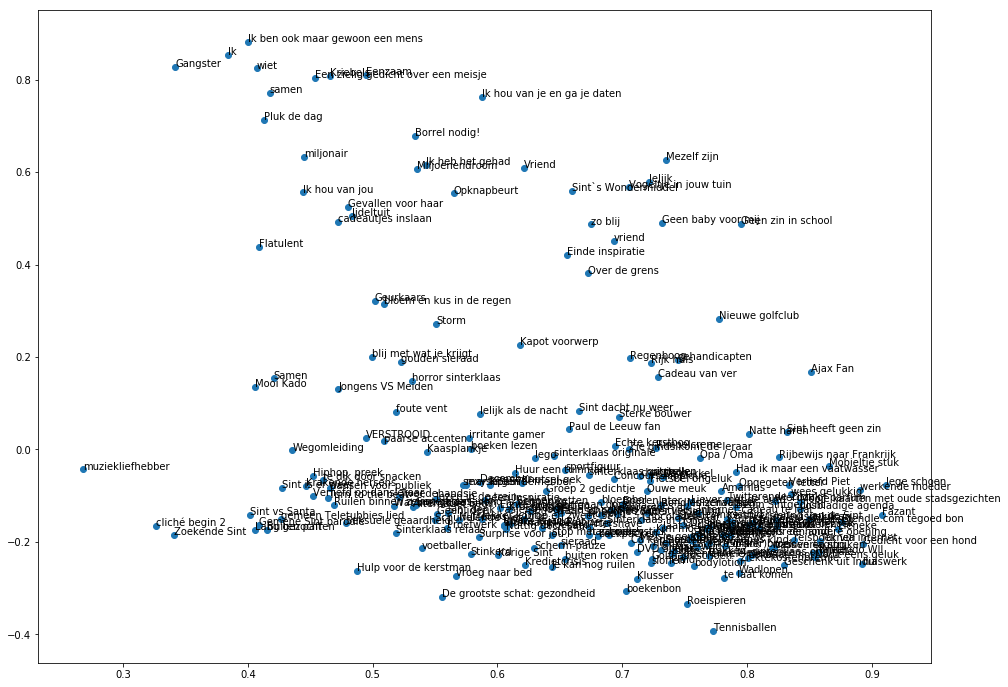

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
plt.scatter(df_topicized['component_1'],df_topicized['component_2'])

for i, txt in enumerate(df_topicized['title']):
    plt.annotate(txt, (df_topicized['component_1'].iloc[i],df_topicized['component_2'].iloc[i]))

plt.show()

In [200]:
# do same for titles
# Fit LSA. Use algorithm = “randomized” for large datasets
titles = df_verses_tagged['title']
vectorizer2 = TfidfVectorizer()
title_tm = vectorizer2.fit_transform(titles)

lsa2 = TruncatedSVD(10, algorithm = 'arpack')
title_tm_lsa = lsa2.fit_transform(title_tm.asfptype())
title_tm_lsa = Normalizer(copy=False).fit_transform(title_tm_lsa)
df_titles_topicized = pd.DataFrame({ 
        'verse_id': df_verses_tagged['verse_id'].tolist(), 
        'title':df_verses_tagged['title'].tolist(), 
        'component_1': title_tm_lsa.T[0], 
        'component_2': title_tm_lsa.T[1]}, index=df_verses_tagged['verse_id'])
df_titles_topicized.head(3)

,component_1,component_2,title,verse_id
verse_id,,,,
001,0.013972,-0.013620,te dik door snacken,001
002,-0.206717,-0.049285,Mooi Kado,002
011,0.057784,-0.053826,Internet-cadeau te laat,011


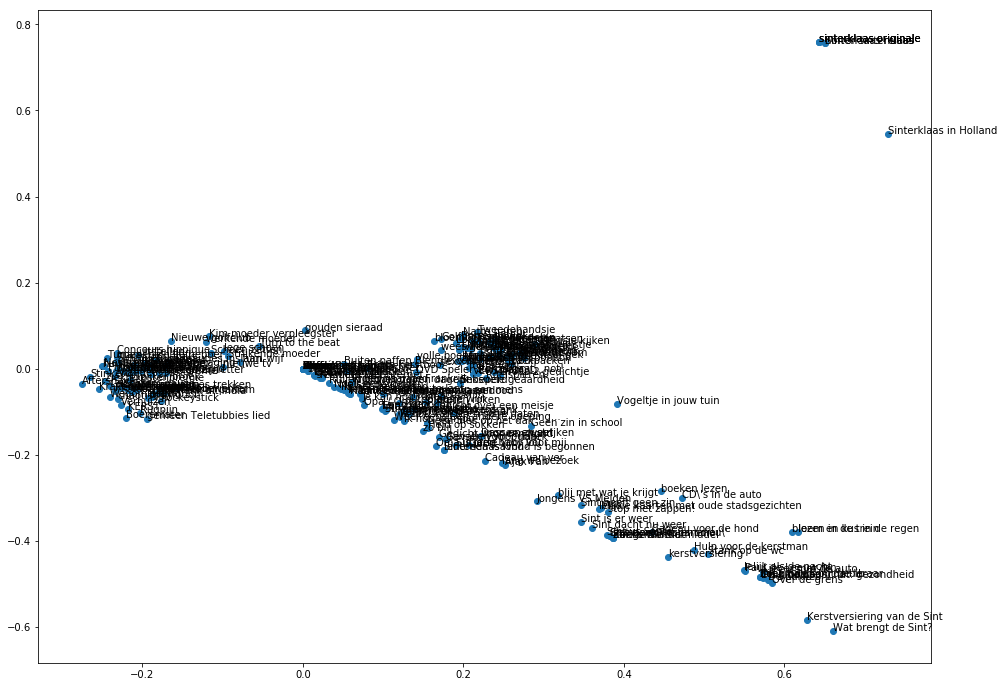

In [201]:
plt.figure(figsize=(16,12))
plt.scatter(df_titles_topicized['component_1'],df_titles_topicized['component_2'])

for i, txt in enumerate(df_titles_topicized['title']):
    plt.annotate(txt, (df_titles_topicized['component_1'].iloc[i],df_titles_topicized['component_2'].iloc[i]))

plt.show()

In [207]:
# and for tags:
tags = df_verses_tagged['tags']
vectorizer3 = TfidfVectorizer()
tags_tm = vectorizer3.fit_transform(tags)

lsa3 = TruncatedSVD(10, algorithm = 'arpack')
tags_tm_lsa = lsa3.fit_transform(tags_tm.asfptype())
tags_tm_lsa = Normalizer(copy=False).fit_transform(tags_tm_lsa)
df_tags_topicized = pd.DataFrame({ 
        'verse_id': df_verses_tagged['verse_id'].tolist(), 
        'title':df_verses_tagged['title'].tolist(),     
        'tags':df_verses_tagged['tags'].tolist(), 
        'component_1': tags_tm_lsa.T[0], 
        'component_2': tags_tm_lsa.T[1]}, index=df_verses_tagged['verse_id'])
df_tags_topicized.head(3)

,component_1,component_2,tags,title,verse_id
verse_id,,,,,
001,0.050817,0.035476,"gewicht,snacken,lekker,eten,bikini,zomer,dik,z...",te dik door snacken,001
002,0.335867,0.193532,"Cadeau,prachtig,Kado,mooi,machtig",Mooi Kado,002
011,0.317624,0.036049,"afbeelding,laat,hebbeding,internet,snel,cadeau...",Internet-cadeau te laat,011


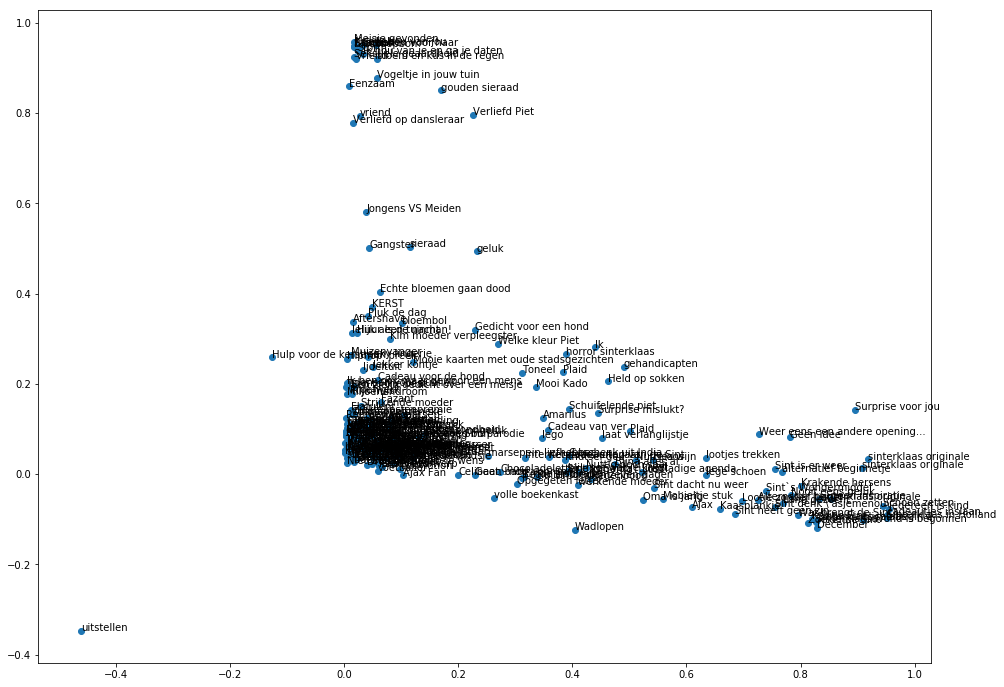

In [208]:
plt.figure(figsize=(16,12))
plt.scatter(df_tags_topicized['component_1'],df_tags_topicized['component_2'])

for i, txt in enumerate(df_tags_topicized['title']):
    plt.annotate(txt, (df_tags_topicized['component_1'].iloc[i],df_tags_topicized['component_2'].iloc[i]))

plt.show()

In [401]:
# merge results into one df
df_categorized = pd.DataFrame({ 
        'verse_id': df_verses_tagged['verse_id'].tolist(), 
        'title':df_verses_tagged['title'].tolist(),     
        'tags':df_verses_tagged['tags'].tolist(), 
        'verse':df_verses_tagged['verse'].tolist(),
        'verse_c1': dtm_lsa.T[0], 
        'verse_c2': dtm_lsa.T[1],
        'title_c1': title_tm_lsa.T[0], 
        'title_c2': title_tm_lsa.T[1],
        'tags_c1': tags_tm_lsa.T[0], 
        'tags_c2': tags_tm_lsa.T[1] },
        index=df_verses_tagged['verse_id'])
df_categorized.head(3)

,tags,tags_c1,tags_c2,title,title_c1,title_c2,verse,verse_c1,verse_c2,verse_id
verse_id,,,,,,,,,,
001,"gewicht,snacken,lekker,eten,bikini,zomer,dik,z...",0.050817,0.035476,te dik door snacken,0.013972,-0.013620,"Sint zag jou laatst weer snacken, hij kneep z...",0.460238,-0.064983,001
002,"Cadeau,prachtig,Kado,mooi,machtig",0.335867,0.193532,Mooi Kado,-0.206717,-0.049285,"oh oh oh Wat een mooi kado allemachtig, is ec...",0.405926,0.136139,002
011,"afbeelding,laat,hebbeding,internet,snel,cadeau...",0.317624,0.036049,Internet-cadeau te laat,0.057784,-0.053826,"Helaas ging internet niet zo snel, maar krijge...",0.760931,-0.137678,011


In [402]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T)
sims = pd.DataFrame(similarity,index=df_topicized['verse_id'], columns=df_topicized['verse_id']).head(10)

### Make plots for some manual topic selections (tag based)

In [288]:
df_categorized[df_topicized['tags'].str.contains('sport')]

,tags,tags_c1,tags_c2,title,title_c1,title_c2,verse_c1,verse_c2,verse_id
verse_id,,,,,,,,,
05,"slank,dun,strak,sport,bewegen,sportief,lijf,bu...",0.045784,0.115351,sportfiguur,-0.217959,-0.048766,0.654388,-0.043805,05
11,"club,sport,vrouw,voetbal,zondag",0.059283,0.007574,voetballer,-0.224124,-0.004445,0.539695,-0.213774,11
31,"drop,zweet,sport,snoep",0.040553,0.021037,Drop en zweet,0.222613,-0.155848,0.621031,-0.150901,31
712,"roei,sterk,gast,gewichtsheffen,ambitie,gewicht...",0.017642,0.032673,Roeispieren,0.227824,-0.022170,0.751806,-0.333242,712
771,"verliezen,ballen,sport,bal,winnen,tennisbal,we...",0.095881,0.069800,Tennisballen,-0.233030,-0.049088,0.772723,-0.392681,771
951,"ajax,johan cruijf,politiek,az,fan,voetballen,v...",0.103961,-0.002883,Ajax Fan,0.251312,-0.223041,0.850807,0.167630,951


In [327]:
def get_booldf_filter(df_withtags, tag1, tag2):
    return (df_withtags['tags'].str.contains(tag1)) | (df_withtags['tags'].str.contains(tag2))

def get_selection(df_withtags, tag1, tag2):
    return df_withtags[get_booldf_filter(df_withtags, tag1,tag2)

def plot_selection(tag1, tag2):
    df = get_selection(df_categorized, tag1,tag2)
    
    f, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(16,20))
    ax1.scatter(df['verse_c1'],df['verse_c2'])
    ax1.set_title('Verses - LSA first 2 components')
    ax2.scatter(df['title_c1'],df['title_c2'])
    ax2.set_title('Titles - LSA first 2 components')
    ax3.scatter(df['tags_c1'],df['tags_c2'])
    ax3.set_title('Tags - LSA first 2 components')

    for i, txt in enumerate(df['title']):
        ax1.annotate(txt, (df['verse_c1'].iloc[i],df['verse_c2'].iloc[i]))
        ax2.annotate(txt, (df['title_c1'].iloc[i],df['title_c2'].iloc[i]))
        ax3.annotate(txt, (df['tags_c1'].iloc[i],df['tags_c2'].iloc[i]))
        
    plt.show()

SyntaxError: invalid syntax (<ipython-input-327-dd548690fdf1>, line 7)

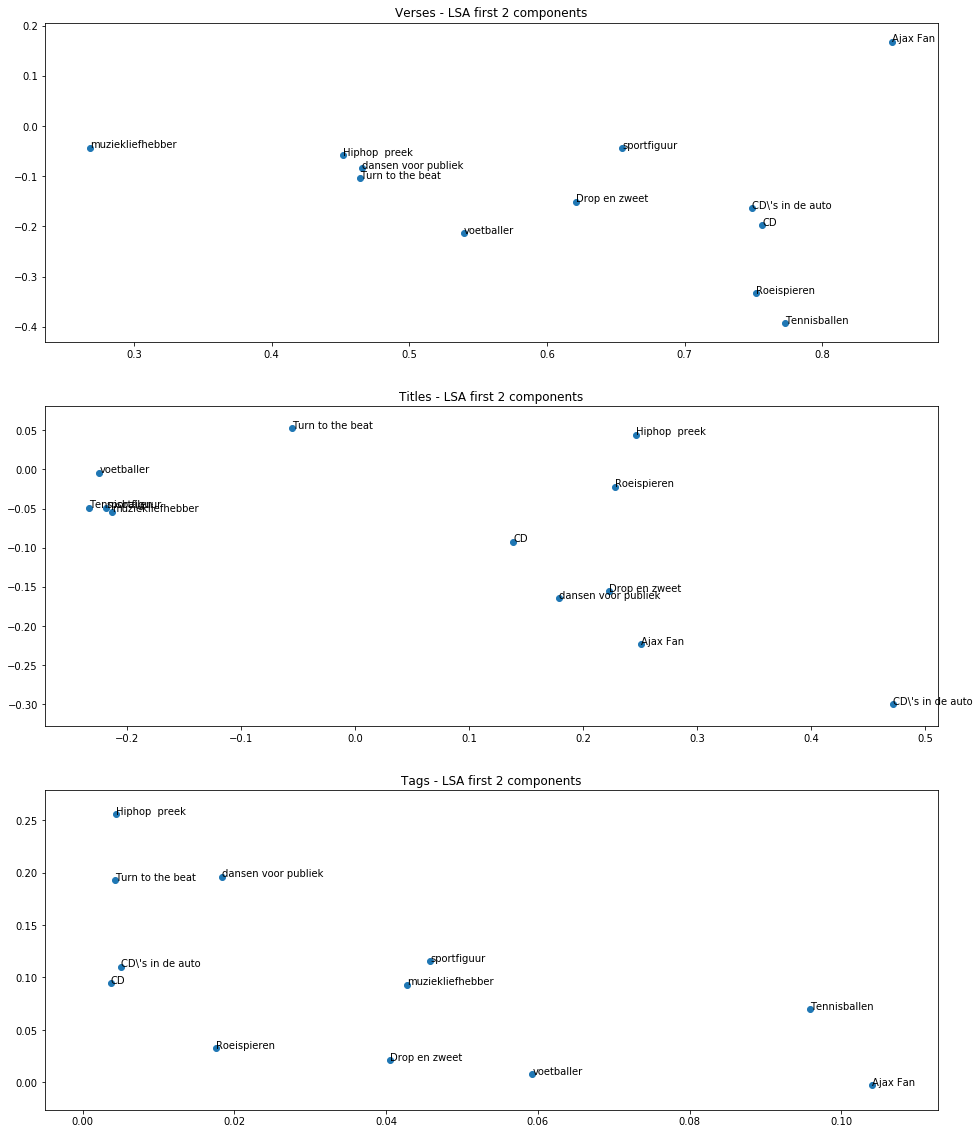

In [328]:
plot_selection('sport','muziek')

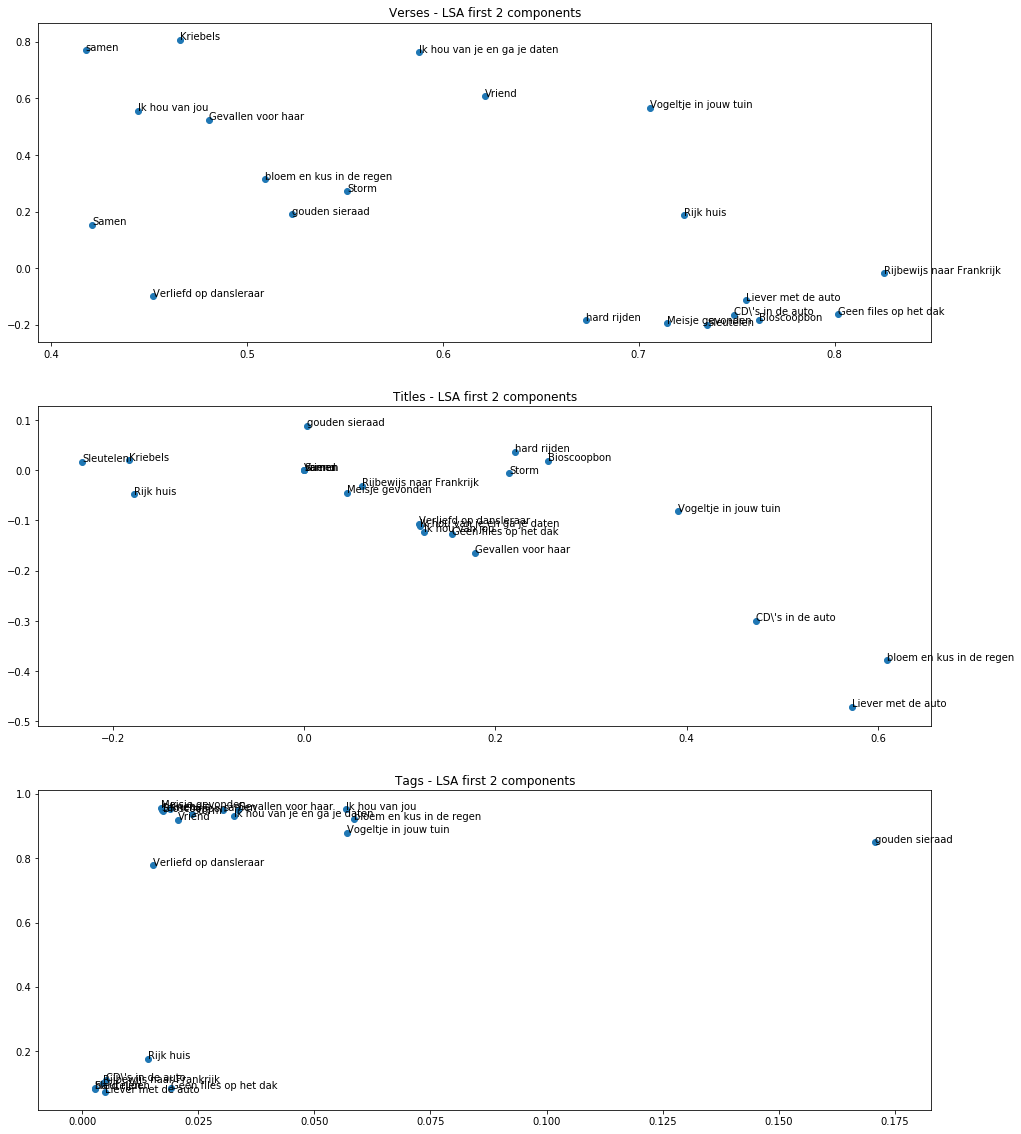

In [323]:
plot_selection('liefde','auto')

In [296]:
# try similarity via weblingtools.utv.nl
df_sport_muziek = get_selection(df_verses_tagged, 'sport','muziek')

In [297]:
df_sport_muziek.head(3)

,verse_id,title,verse,tags,ascii_verse
11,05,sportfiguur,Heel actief ben jij sinds kort bezeten van een...,"slank,dun,strak,sport,bewegen,sportief,lijf,bu...",sportfiguur Heel actief ben jij sinds kort bez...
22,11,voetballer,Als voetballers nog niet bestonden had jij ze ...,"club,sport,vrouw,voetbal,zondag",voetballer Als voetballers nog niet bestonden ...
67,302,CD,"Crescendo, Tempo, Pianissimo, Bravo! Sinterkla...","kamer,zang,gang,CD,zingen,tempo,muziek,liedjes","CD Crescendo, Tempo, Pianissimo, Bravo! Sinter..."


In [298]:
df_sport_muziek['ascii_verse'].to_csv('sportmuziek.txt', index=False, encoding='ascii')

In [299]:
# try similarity via weblingtools.utv.nl
df_liefde_auto = get_selection(df_verses_tagged, 'liefde','auto')

In [300]:
df_liefde_auto.head(3)

,verse_id,title,verse,tags,ascii_verse
5,021,bloem en kus in de regen,Jou ogen stralen van geluk Jij geeft mij een p...,"kus,geluk,verlegen,bloemen,bloemstuk,liefde,regen",bloem en kus in de regen Jou ogen stralen van ...
10,042,Rijbewijs naar Frankrijk,Jullie hebben een huis in Frankrijk Zou leuk z...,"handbereik,rijbewijs,chauffeur,rijden,kaartje,...",Rijbewijs naar Frankrijk Jullie hebben een hui...
16,08,Gevallen voor haar,"Ik ben voor haar gevallen, Languit op de straa...","gevallen,straat,liefde,stoep,mooi,ogen,houden","Gevallen voor haar Ik ben voor haar gevallen, ..."


In [301]:
df_liefde_auto['ascii_verse'].to_csv('liefdeauto.txt', index=False, encoding='ascii')

# Similarities 

In [360]:
# Compute document similarity using LSA components
sim_verse = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T)
sim_title = np.asarray(np.asmatrix(title_tm_lsa) * np.asmatrix(title_tm_lsa).T)
sim_tags = np.asarray(np.asmatrix(tags_tm_lsa) * np.asmatrix(tags_tm_lsa).T)

df_sim_verse = pd.DataFrame(sim_verse,index=df_categorized['verse_id'], columns=df_categorized['verse_id'])
df_sim_title = pd.DataFrame(sim_title,index=df_categorized['verse_id'], columns=df_categorized['verse_id'])
df_sim_tags = pd.DataFrame(sim_tags,index=df_categorized['verse_id'], columns=df_categorized['verse_id'])

In [361]:
df_filter = (df_categorized['tags'].str.contains('sport')) | (df_categorized['tags'].str.contains('muziek'))
df_sim_verse_sportmuziek = df_sim_verse[df_filter][df_sim_verse[df_filter].index.tolist()]

In [362]:
# extend with titles
df_sim_verse_sportmuziek = df_sim_verse_sportmuziek.join(df_categorized['title'])

In [365]:
titles = df_sim_verse_sportmuziek['title'].tolist() + ['title']
df_sim_verse_sportmuziek.columns = titles

In [366]:
df_sim_verse_sportmuziek

,sportfiguur,voetballer,CD,Drop en zweet,dansen voor publiek,muziekliefhebber,CD\'s in de auto,Turn to the beat,Hiphop preek,Roeispieren,Tennisballen,Ajax Fan,title
verse_id,,,,,,,,,,,,,
05,1.000000,0.372647,0.307154,0.590726,0.271943,0.765156,0.395979,0.106732,0.297348,0.664812,0.640247,0.305729,sportfiguur
11,0.372647,1.000000,0.476228,0.380593,0.414499,0.285979,0.468543,0.513137,0.236779,0.841704,0.558644,0.471009,voetballer
302,0.307154,0.476228,1.000000,0.285155,0.618857,0.197760,0.776440,0.713228,0.456319,0.521158,0.610609,0.777619,CD
31,0.590726,0.380593,0.285155,1.000000,0.180732,0.257122,0.566986,0.067041,0.266444,0.573018,0.496123,0.517074,Drop en zweet
321,0.271943,0.414499,0.618857,0.180732,1.000000,0.417535,0.418842,0.924661,0.886991,0.444478,0.100524,0.282458,dansen voor publiek
332,0.765156,0.285979,0.197760,0.257122,0.417535,1.000000,-0.020587,0.211572,0.329681,0.348620,0.230534,-0.000398,muziekliefhebber
41,0.395979,0.468543,0.776440,0.566986,0.418842,-0.020587,1.000000,0.516476,0.358400,0.658049,0.678873,0.718912,CD\'s in de auto
421,0.106732,0.513137,0.713228,0.067041,0.924661,0.211572,0.516476,1.000000,0.689267,0.457684,0.202515,0.361870,Turn to the beat
521,0.297348,0.236779,0.456319,0.266444,0.886991,0.329681,0.358400,0.689267,1.000000,0.390672,-0.001190,0.247886,Hiphop preek


In [379]:
df_filter = (df_categorized['tags'].str.contains('liefde'))
df_sim_verse_liefde = df_sim_verse[df_filter][df_sim_verse[df_filter].index.tolist()]
df_sim_verse_liefde = df_sim_verse_liefde.join(df_categorized['title'])
df_sim_verse_liefde

,021,08,121,361,432,51,512,61,611,68,741,811,841,911,title
verse_id,,,,,,,,,,,,,,,
021,1.000000,0.507591,0.609399,0.623726,0.656487,0.647558,0.568200,0.042696,0.530823,0.802815,0.545417,0.108641,0.755191,0.863545,bloem en kus in de regen
08,0.507591,1.000000,0.616625,0.646499,0.704429,0.600249,0.312618,-0.004201,0.797023,0.226567,0.681003,0.524979,0.653289,0.374661,Gevallen voor haar
121,0.609399,0.616625,1.000000,0.863966,0.860352,0.345187,0.340858,0.298302,0.823670,0.600502,0.891668,0.135657,0.525453,0.798083,Ik hou van je en ga je daten
361,0.623726,0.646499,0.863966,1.000000,0.886399,0.624526,0.087545,0.124637,0.638861,0.471428,0.743427,0.133490,0.753138,0.721992,samen
432,0.656487,0.704429,0.860352,0.886399,1.000000,0.537586,0.201158,0.317326,0.716784,0.506144,0.841158,0.324580,0.714939,0.683862,Vriend
51,0.647558,0.600249,0.345187,0.624526,0.537586,1.000000,0.291998,0.057215,0.280764,0.445528,0.203610,0.494371,0.952756,0.404383,Samen
512,0.568200,0.312618,0.340858,0.087545,0.201158,0.291998,1.000000,0.407836,0.565677,0.563273,0.190181,0.173570,0.335813,0.445503,Bioscoopbon
61,0.042696,-0.004201,0.298302,0.124637,0.317326,0.057215,0.407836,1.000000,0.246713,0.099067,0.169541,0.138772,0.095361,0.003429,Meisje gevonden
611,0.530823,0.797023,0.823670,0.638861,0.716784,0.280764,0.565677,0.246713,1.000000,0.400474,0.813598,0.243486,0.451442,0.594308,Vogeltje in jouw tuin


In [525]:
def show_verse(verse_id, sameline=False):
    title = df_categorized.loc[[verse_id]][['title']].iloc[0][0]
    verse = df_categorized.loc[[verse_id]][['verse']].iloc[0][0]
    if sameline:
        print(title,": ", verse)
    else:
        print(title)
        print(verse)
        
def show_title(verse_id):
    title = df_categorized.loc[[verse_id]][['title']].iloc[0][0]
    print(title)

In [526]:
show_verse('811')

Verliefd op dansleraar
Dansen doet zij(hij) erg graag, met heel haar hart en ziel. En ze ging het nog leuker vinden, toen ze(hij) op de dansleraar(es) viel.    (met dank aan M.J.) 



In [514]:
show_verse('021')

bloem en kus in de regen
Jou ogen stralen van geluk Jij geeft mij een prachtig bloemstuk Onder de stralen van de regen Word ik door jou kus verlegen    (met dank aan Giittaaa) 



In [515]:
show_verse('361')

samen
wij twee samen twee lichamen jij en ik ik je chick jij mijn held ik smelt jij en ik samen voor altijd    (met dank aan Danique Franssen) 



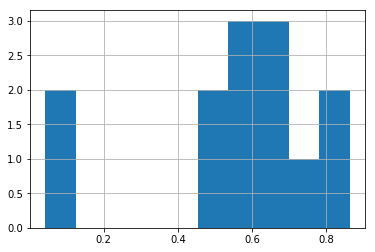

In [390]:
avg_021_liefde = df_sim_verse_liefde[(df_sim_verse_liefde.index!='021')]['021']
avg_021_liefde.hist()

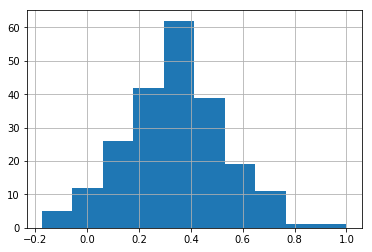

In [393]:
avg_021_all = df_sim_verse[(~df_sim_verse.index.isin(avg_021_liefde.index))]['021']
avg_021_all.hist()

In [407]:
df_filter = (df_categorized['tags'].str.contains('auto'))
df_sim_verse_auto = df_sim_verse[df_filter][df_sim_verse[df_filter].index.tolist()]
df_sim_verse_auto = df_sim_verse_auto.join(df_categorized['title'])
df_sim_verse_auto

,042,09,41,55,65,73,85,title
verse_id,,,,,,,,
042,1.000000,0.723888,0.754119,0.666606,0.701672,0.568897,0.542337,Rijbewijs naar Frankrijk
09,0.723888,1.000000,0.588117,0.607976,0.490657,0.554456,0.510991,Sleutelen
41,0.754119,0.588117,1.000000,0.879024,0.719579,0.312545,0.703104,CD\'s in de auto
55,0.666606,0.607976,0.879024,1.000000,0.871738,0.507046,0.672719,Geen files op het dak
65,0.701672,0.490657,0.719579,0.871738,1.000000,0.377481,0.405243,Rijk huis
73,0.568897,0.554456,0.312545,0.507046,0.377481,1.000000,0.685135,hard rijden
85,0.542337,0.510991,0.703104,0.672719,0.405243,0.685135,1.000000,Liever met de auto


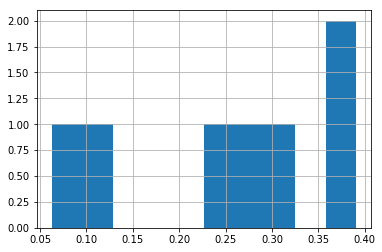

In [410]:
avg_021_auto = df_sim_verse[(df_sim_verse.index.isin(df_sim_verse_auto.index))]['021']
avg_021_auto.hist()

In [547]:
def show_closest(verse_id, num, elaborate = False):    
    col1 = df_sim_verse[verse_id].sort_values(ascending=False).head(num)
    ids1 = col1.index.tolist()
    col2 = df_sim_title[verse_id].sort_values(ascending=False).head(num)
    ids2 = col2.index.tolist()
    col3 = df_sim_tags[verse_id].sort_values(ascending=False).head(num)
    ids3 = col3.index.tolist()
    if (elaborate):
        show_verse(ids1[0])
        print("---------------")
        print("\n- VERSE BASED -")
        for i in range(1,len(ids1)): show_verse(ids1[i], sameline=True)
        print("\n- TITLE BASED -")
        for i in range(1,len(ids2)): show_verse(ids2[i], sameline=True) 
        print("\n- TAGS BASED -")
        for i in range(1,len(ids3)): show_verse(ids3[i], sameline=True)
    else:
        show_title(ids1[0])
        print("---------------")
        print("\n- VERSE BASED -")
        for i in range(1,len(ids1)): show_title(ids1[i])
        print("\n- TITLE BASED -")
        for i in range(1,len(ids2)): show_title(ids2[i])
        print("\n- TAGS BASED -")
        for i in range(1,len(ids3)): show_title(ids3[i])
                

In [549]:
show_closest('811',10)

Verliefd op dansleraar
---------------

- VERSE BASED -
te dik door snacken
Seksuele geaardheid
Hiphop  preek
Welke kleur Piet
dansen voor publiek
Jongens VS Meiden
Surprise mislukt?
Turn to the beat
Lootje zonder lijstje

- TITLE BASED -
Held op sokken
Verliefd Piet
Schuifelende piet
Welke kleur Piet
Lang gezocht
lang wc bezoek
Ajax
alternatief beginnetje
Alternatief begin

- TAGS BASED -
Seksuele geaardheid
Kriebels
Samen
Meisje gevonden
Hiphop  preek
bloem en kus in de regen
dansen voor publiek
Bioscoopbon
Turn to the beat


In [555]:
show_closest('05',8)

sportfiguur
---------------

- VERSE BASED -
bloembol
Natte haren
zwanger
Glaasje wijn
Opa / Oma
Toneel
Boerenlater

- TITLE BASED -
Krakende hersens
chaotisch
bodylotion
Overlevingsstrijd
Geschenk uit India
Kredietcrisis
Bank Medewerker

- TAGS BASED -
(Spijker)broek
sexy lingerie
lekker kontje
Drop en zweet
Opa / Oma
te dik door snacken
Stinkerd


In [554]:
df_categorized[df_categorized['tags'].str.contains('school')]

,tags,tags_c1,tags_c2,title,title_c1,title_c2,verse,verse_c1,verse_c2,verse_id
verse_id,,,,,,,,,,
081,"proefwerk,examen,huiswerk,vrienden,school,stud...",0.011288,0.180068,Proefwerk,0.233471,0.027600,Je zou wel willen dat je alles al kende want h...,0.559216,-0.169441,081
18,"waarderen,leren,school,lol",0.010623,0.069124,Naar school,0.137559,-0.066347,Elke dag moet je naar school dat doe je echt n...,0.647814,-0.139262,18
48,"zappen,lui,zin,toekomst,stappen,school,riool",0.062345,0.056124,Geen zin in school,0.284902,-0.132033,Spoel de school maar door’t riool veel liever ...,0.794812,0.488467,48
522,"groep,bloed,schrijven,school,7,kleuter,leren,a...",0.018560,0.077847,Groep 2 gedichtje,0.245911,-0.013435,Je bent veel bezig met leren Zo reken je met a...,0.639170,-0.090506,522
64,"wijs,huiswerk,school,vrije tijd,leren",0.058239,0.073523,huiswerk,-0.249597,0.005672,huiswerk lijkt soms wel een straf en het is no...,0.892415,-0.248769,64
932,"boos,lied,slecht,lezen,irritant,stoomboot,Brus...",0.037257,0.043482,Zie ginds komt de leraar,0.568969,-0.483627,Zie ginds komt de leraar met proefwerken aan. ...,0.705660,0.000322,932


In [556]:
show_closest('081',10)

Proefwerk
---------------

- VERSE BASED -
Meisje gevonden
Groep 2 gedichtje
bodylotion
wierook of parfum
Verhuizen
Naar school
geen enkele wens
lekker kontje
Golfhandschoen

- TITLE BASED -
hard rijden
Nuttig doch saai
lekker kontje
Mobieltje stuk
Nutteloos
Regenboog
sexy lingerie
Bioscoopbon
backpacken

- TAGS BASED -
Naar school
huiswerk
Groep 2 gedichtje
Geen zin in school
Zie ginds komt de leraar
boekenbon
boek halen bij de bib.
boeken lezen
Blendle.com tegoed bon


In [564]:
df_categorized[(df_categorized['tags'].str.contains('computer')) | (df_categorized['title'].str.contains('computer'))]

,tags,tags_c1,tags_c2,title,title_c1,title_c2,verse,verse_c1,verse_c2,verse_id
verse_id,,,,,,,,,,
112,"winnen,spelcomputer,irritant,spelen,looser,ver...",0.085338,0.059779,irritante gamer,-0.209736,0.007584,altijd als wij gaan gamen moet jij controller...,0.577594,0.024875,112
13,"WII,fitness,Nintendo,gamen,afvallen,computer",0.011470,0.046725,Nintendo WII,0.235613,0.058106,Niet meer naar de fitnesszaal dat gebeurt tege...,0.857972,-0.222659,13
422,"pagina,krant,interesse,geld,on-line,computer,i...",0.042652,0.082867,Blendle.com tegoed bon,0.139504,0.011395,"Als je op de hoogte wilt blijven, dan koop je ...",0.876211,-0.156946,422


In [565]:
show_closest('112',10)

irritante gamer
---------------

- VERSE BASED -
lelijk als de nacht
televisie kijken
Twitterende Zitzak
CD\'s in de auto
reisboek via internet
Rijk huis
Geen files op het dak
Aftershave
backpacken

- TITLE BASED -
Rimpelcreme
Kredietcrisis
cadeautjes inslaan
Kriebels
voetballer
Turnen
zwanger
gehandicapten
sportfiguur

- TAGS BASED -
Nintendo WII
Sterke drank
Borrel nodig!
Glaasje wijn
Fles wijn
televisie kijken
Ik heb het gehad
Scherm-pauze
backpacken


In [568]:
df_categorized[(df_categorized['tags'].str.contains('geld')) | (df_categorized['title'].str.contains('Kredietcrisis'))]

,tags,tags_c1,tags_c2,title,title_c1,title_c2,verse,verse_c1,verse_c2,verse_id
verse_id,,,,,,,,,,
24,"failliet,Icesave,beurs,kredietcrisis,beleggen,...",0.007441,0.067902,Kredietcrisis,-0.198040,0.011006,Sinds een paar weken kan jij fluiten naar jouw...,0.621804,-0.250027,24
301,"gezin,gelukkig,geld,succes,drank,blij,kort,lev...",0.046662,0.105697,wees gelukkig,0.172773,0.042904,Je bent een echte piekeraar toch heb je alles...,0.835022,-0.096937,301
422,"pagina,krant,interesse,geld,on-line,computer,i...",0.042652,0.082867,Blendle.com tegoed bon,0.139504,0.011395,"Als je op de hoogte wilt blijven, dan koop je ...",0.876211,-0.156946,422
47,"blut,Fortis,aandeel,geld,beleggen,aandelen,kre...",0.027609,0.109849,Fortis aandelen,0.218644,0.065441,Jammer dat jouw geld nu vort is door dat gedoe...,0.809901,-0.170142,47
532,"pech,sint,poen,cadeau,oud,sinterklaas,tijd,gul...",0.634990,-0.002274,lege schoen,-0.097963,0.041674,Sint had geen tijd om boodschappen te doen en ...,0.911645,-0.076950,532
631,"geld,bed,koffie,lui,miljoen,personeel,rust,mil...",0.018385,0.109563,miljonair,0.193088,0.017586,o had ik maar een paar miljoen dan zou ik lekk...,0.445092,0.633394,631
65,"tuin,rijk,huis,auto,geld",0.014250,0.176864,Rijk huis,-0.177380,-0.048073,Als ik zo jouw huis bekijk ben je echt ontzett...,0.722934,0.186927,65
732,"waardering,politiek,zorg,verpleging,verpleegst...",0.080163,0.299971,Kim moeder verpleegster,-0.117330,0.074908,Werken in de zorg is geen sinecure de verpleeg...,0.726660,-0.177431,732
86,"tuin,tuinman,geld,krenterig,gras,grasmaaien",0.022100,0.313670,Huur een tuinman!,0.058750,-0.058781,Aan grasmaaien heb jij een broerje dood je vin...,0.614184,-0.049980,86


In [569]:
show_closest('24',10)

Kredietcrisis
---------------

- VERSE BASED -
Kroegtijger
Boerenlater
bloembol
Echte bloemen gaan dood
Knutsel-gek
Rondjes schaatsen
te laat komen
Turn-wijf
Natte haren

- TITLE BASED -
irritante gamer
Geurkaars
cadeautjes inslaan
Overlevingsstrijd
Rimpelcreme
Kriebels
zwanger
sportfiguur
voetballer

- TAGS BASED -
De grootste schat: gezondheid
Fortis aandelen
miljonair
Ik ben ook maar gewoon een mens
Nespresso
Miljoenendroom
buiten roken
Rijk huis
Huur een tuinman!


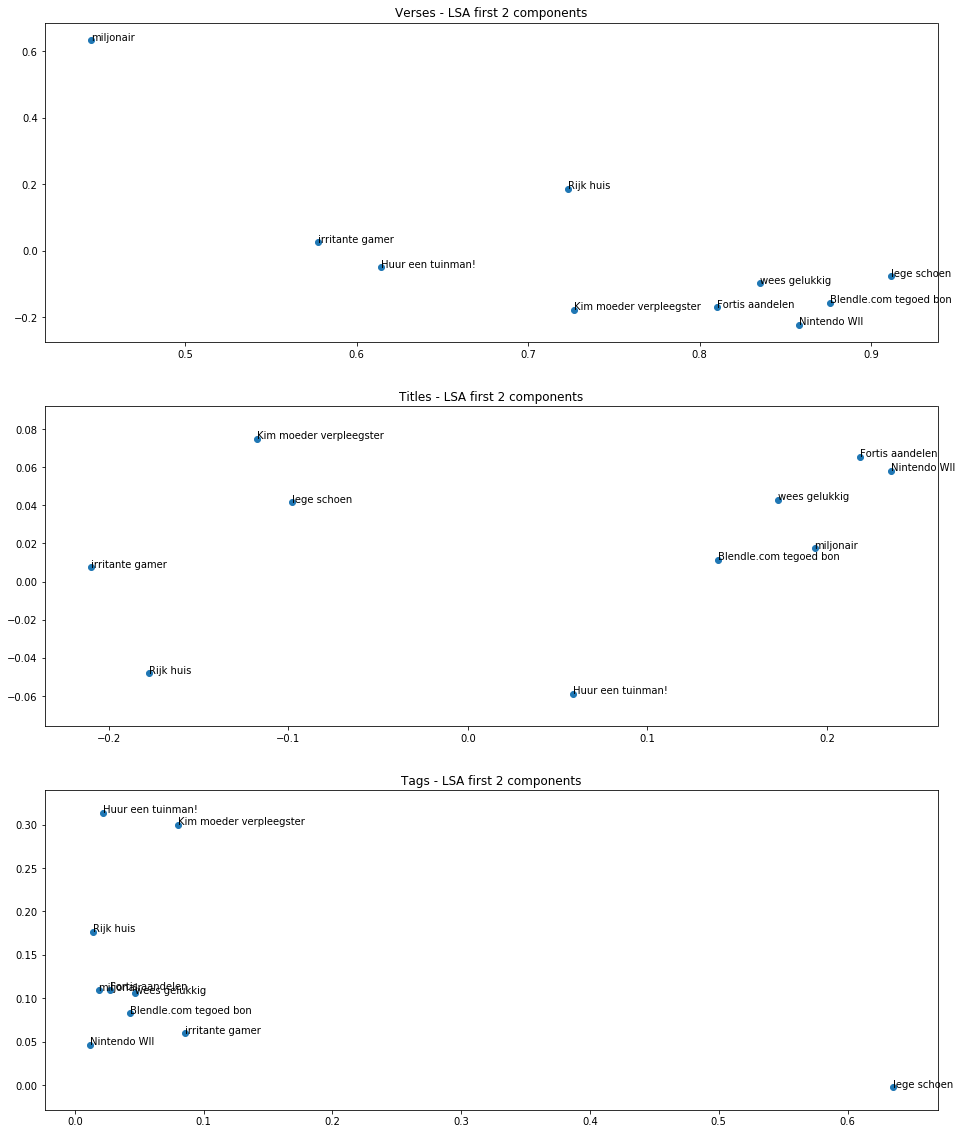

In [571]:
plot_selection('computer','geld')